In [1]:
import os 
import cv2
import pandas as pd 
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tqdm import tqdm

# Skin Disease Dataset

In [2]:
gnd_truth = pd.read_csv("data\SkinDiseaseDataset\ISIC_2019_Training_GroundTruth.csv")
gnd_truth.head()

IMG_NAMES = gnd_truth['image']
TRAIN_IMG_RT_PATH = 'data/ISIC_2019_Training_Input/'
TEST_IMG_RT_PATH = 'data/ISIC_2019_Test_Input'

In [3]:
gnd_truth.head()

,image,MEL,NV,BCC,AK,BKL,DF,VASC,SCC,UNK
0,ISIC_0000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ISIC_0000001,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ISIC_0000002,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ISIC_0000003,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ISIC_0000004,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
labels = np.array(gnd_truth.drop(columns =["image", "UNK"]))

<BarContainer object of 8 artists>

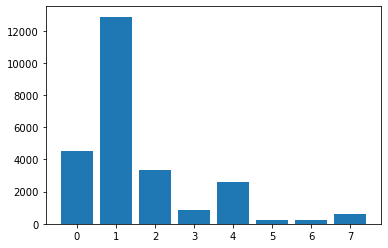

In [5]:
c, freq = np.unique(np.argmax(labels, axis = 1) , return_counts = True)
plt.bar(c, freq)

In [6]:
def returnClassIndex(trainY,class_index):
    labels = np.argmax(trainY, axis = 1)
    return [ i for i in range(len(labels)) if labels[i] == class_index]

In [7]:
### Randomly Balance Sample from classes  
smpl_test_idxs = []
smpl_train_idxs = []
for i in range(len(labels[1])):
    idxs = np.array(returnClassIndex(labels, i))
    sel = np.random.RandomState(seed = 42).permutation(len(idxs))
    #print(len(idxs))
    ### Shuffle
    train_sel = list(sel[:int(0.75*len(idxs))])
    test_sel = list(sel[int(0.75*len(idxs)):])
    smpl_train_idxs += list(idxs[train_sel])
    smpl_test_idxs += list(idxs[test_sel])
    
### Which classes to augment ?
classes_to_aug = [0,2, 3, 4,5,6,7]
indexes_to_aug = []
for i1 in tqdm(classes_to_aug):
    i = 0
    tmp = []
    for i2 in np.argmax(labels[smpl_train_idxs], axis = 1):
        if(i1 == i2):
            tmp.append(i)
        i= i+1
    indexes_to_aug.append(tmp)

### Create and save Dataframe with testing samaples
test_df = pd.DataFrame({"filename": np.array(IMG_NAMES)[smpl_test_idxs],
                        "class": np.argmax(labels[smpl_test_idxs], axis = 1)})
test_df.to_csv("data/test_df.csv")

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1.0/255,
        samplewise_center = True,
        samplewise_std_normalization = True, 
        shear_range=0.5,
        zoom_range=0.5,
        rotation_range = 30,
        vertical_flip = True,
        horizontal_flip=True
)

print("Done!")

100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 111.82it/s]

Done!


In [8]:
aug_y =[]
aug_n =[]

In [13]:
aug_labels = []
aug_names = []
cl = 3 
s = 0
i1 = 0
for i in tqdm(range(int(max(freq)*0.75) - len(indexes_to_aug[cl]))):
    if (i1 == len(indexes_to_aug[cl])-1):
        i1 = 0
        s = s+1
    aug_names.append('IMAGE_{}_{}.jpg'.format(s, indexes_to_aug[cl][i1]))
    aug_labels.append(labels[indexes_to_aug[cl][i1]])
    img = plt.imread(TRAIN_IMG_RT_PATH + IMG_NAMES[indexes_to_aug[cl][i1]] + '.jpg')
    par = train_datagen.get_random_transform(img)
    img1 = train_datagen.apply_transform(img, par)
    cv2.imwrite('data/aumented_skindisease/IMAGE_{}_{}.jpg'.format(s, indexes_to_aug[cl][i1]),img1)

    i1= i1+1
    
aug_y = aug_y + aug_labels
aug_n = aug_n + aug_names 
print("Done!")

100%|██████████████████████████████████████████████████████████████████████████████| 7688/7688 [52:44<00:00,  2.43it/s]


In [10]:
xy = aug_y
xn = aug_n  

In [95]:
aug_df =pd.DataFrame( {'filename': aug_n, 'class':np.argmax(np.array(aug_y), axis =1 )})

In [96]:
aug_df.head()

,filename,class
0,IMAGE_0_2926.jpg,7
1,IMAGE_0_2969.jpg,7
2,IMAGE_0_3015.jpg,7
3,IMAGE_0_3047.jpg,7
4,IMAGE_0_3060.jpg,7


In [99]:
aug_df.to_csv("data/augmentImageNameLabels.csv", index = False)

In [27]:
'data/aumented_skindisease/IMAGE_{}_{}.jpg'.format(indexes_to_aug[cl][0], 0)

'data/aumented_skindisease/IMAGE_20.jpg'

In [24]:
len(indexes_to_aug[cl])

4522

In [90]:
a = np.array([labels[indexes_to_aug[0][0]],labels[indexes_to_aug[0][0]],labels[indexes_to_aug[0][0]]])

In [91]:
a.shape

(3, 8)

In [19]:
cv2.imwrite('data/aumented_skindisease/IMAGE.jpg',img1)

True

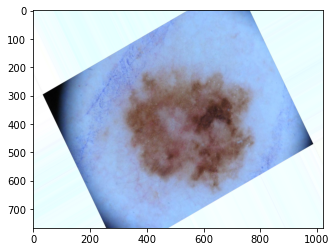

In [13]:
img1 = train_datagen.apply_transform(img, par)
plt.imshow(img1)

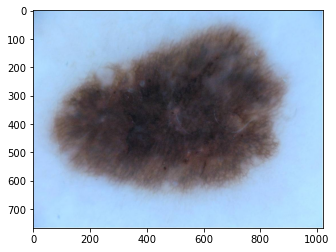

In [70]:
plt.imshow(img)

pop = labels.shape[0]
indexes = np.random.RandomState(seed = 42).permutation(pop)
train_idx, test_idx = list(indexes[:int(.75*pop)]), list(indexes[int(.75*pop):]) 
indexes = np.array([ "data/ISIC_2019_Training_Input/" + m +'.jpg' for m in  IMG_NAMES])
### Dataframes for Generator
train_df = pd.DataFrame({"filename":indexes[train_idx],
                        "class": np.argmax(labels[train_idx], axis = 1).astype(str)})






test_df = pd.DataFrame({"filename":indexes[test_idx],
                        "class": np.argmax(labels[test_idx], axis = 1).astype(str)})


test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_dataframe(
    dataframe = train_df,
    class_mode = 'categorical',
    y_col="class",
    batch_size = batch_size, 
    target_size = (im_size, im_size)
    
)
test_generator = test_datagen.flow_from_dataframe(
    dataframe = test_df,
    class_mode = 'categorical',
    y_col="class",
    batch_size = batch_size,
    target_size = (im_size, im_size)
)






paths_aug = ["data/aumented_skindisease/"+m for m in  list(aug_df["filename"])]
train_paths_o = list(np.array(
    [ "data/ISIC_2019_Training_Input/"+m+'.jpg' for m in IMG_NAMES])[smpl_train_idxs])


paths = np.array(train_paths_o + paths_aug)
#paths_o = list(np.array([ "data/ISIC_2019_Training_Input/"+m+'.jpg' for m in IMG_NAMES]))
#classes =  np.array(
 #   list(np.argmax(labels, axis =1)[smpl_train_idxs]) + list(aug_df["class"])).astype(str)
#indexes1 = np.random.RandomState(seed = 42).permutation(len(paths_o))
#train_idx, test_idx = list(indexes1[:int(.75*pop)]), list(indexes1[int(.75*pop):]) 

im_size =64
channels = 3
num_classes = 8
lr = 0.001 ### learning rate
input_shape = ( im_size, im_size, channels)
l1_lambda = 0 ### L1 regularization lambda parameter
l2_lambda = 0
keep_prob = 0.3
batch_size = 64